In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib

params = {'font.family': 'Arial','font.weight':'normal'} #set the basic parameters for figure
plt.rcParams["figure.dpi"] = 300
matplotlib.rcParams.update(params)

In [2]:
readdata_dir = "D:/Develop/Compensatory-Evolution/CodeForGithub/File/"
savedata_dir = "D:/Develop/Compensatory-Evolution/CodeForGithub/FigureS6/"

In [3]:
#load the energy of stability data 
RescuableEnergy_data = pd.read_csv(readdata_dir + "EnergyCalculationVariants/unfitRescuableEnergy.tsv",
                                   sep = "\t")
NonrescuableEnergy_data = pd.read_csv(readdata_dir + "EnergyCalculationVariants/unfitNonRescuableEnergy.tsv",
                                     sep = "\t")
#concat these twol files
ifRes_list = [1]*RescuableEnergy_data.shape[0]
ifRes_list.extend([0]*NonrescuableEnergy_data.shape[0])

In [4]:
#load the rescuability data and merge with AllSub_data 
energy_list = list(RescuableEnergy_data["ddG_foldOpt"].values)
energy_list.extend(NonrescuableEnergy_data["ddG_foldOpt"].values)

subN_list = list(RescuableEnergy_data["dist_Scer"].values)
subN_list.extend(NonrescuableEnergy_data["dist_Scer"].values)
#make the dataframe
allData = pd.DataFrame({"energy":energy_list,
                       "subN":subN_list,
                       "if_res":ifRes_list})
allData

,energy,subN,if_res
0,26.41,9,1
1,37.59,5,1
2,9.93,9,1
3,29.88,5,1
4,38.12,7,1
...,...,...,...
2414,88.07,7,0
2415,104.60,7,0
2416,97.10,7,0
2417,108.28,7,0


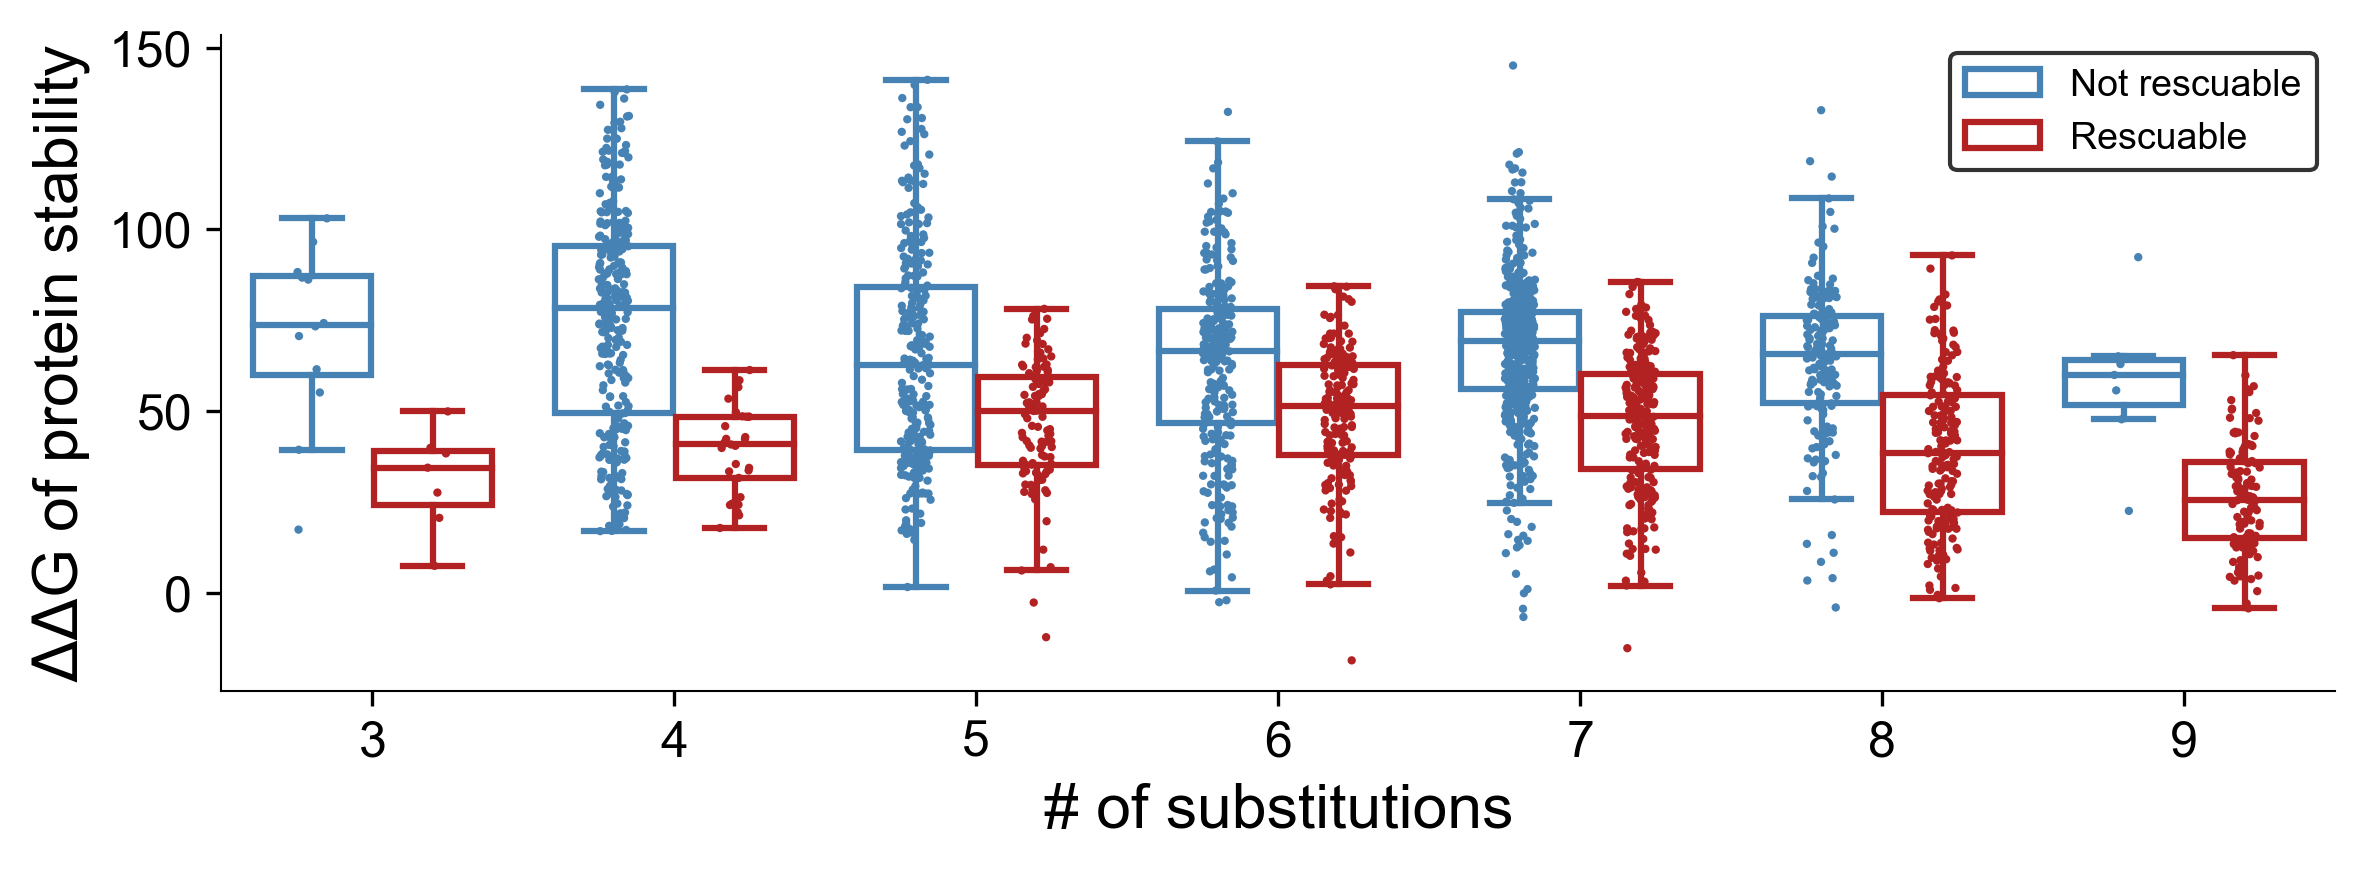

In [6]:
#using sns to group these two different groups and make the U test
import seaborn as sns
#only keep subN from 3-9
allData_plot  = allData[(allData["subN"] <=9 ) & ( allData["subN"] >=3 )]
plt.rcParams["figure.dpi"] = 300
plt.figure(figsize=(8,3))
ax = plt.subplot(111)
#set the platelle color of my own
colorsList = ["steelblue","firebrick"]
Mycolors = sns.set_palette(colorsList)
sns.boxplot(x = "subN",y = "energy",hue = "if_res", data = allData_plot, fliersize=0,
           linewidth=1.5, ax = ax,  palette = Mycolors)

plt.setp(ax.artists, facecolor='w')#make each box has white facecolor

color_map = {
             0:"steelblue",   1:"firebrick",
             2:"steelblue",   3:"firebrick",
             4:"steelblue",   5:"firebrick",
             6:"steelblue",   7:"firebrick",
             8:"steelblue",   9:"firebrick",
            10:"steelblue",  11:"firebrick",
            12:"steelblue",  13:"firebrick"
            }
for i,artist in enumerate(ax.artists):
    # Set the linecolor on the artist to the facecolor, and set the facecolor to None
    color = color_map[i]
    artist.set_edgecolor(color)
    # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same colour as above
    for j in range(i*6,i*6+6):
        line = ax.lines[j]
        line.set_color(color)
        

#add the strippoints
sns.stripplot(x = "subN",y = "energy",hue = "if_res", data = allData_plot, 
              dodge = True, size = 2,  linewidth = 0)

#set the legend color and labels
legend  = ax.legend(handles = [ax.artists[0], ax.artists[1]], labels = ["Not rescuable","Rescuable"],
                    edgecolor='k', fontsize=9 )   
legend = legend.get_frame().set_linewidth(1.0)

#eraser the upper and right lines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(0.5)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel("# of substitutions",fontsize = 15)
plt.ylabel(r'$\Delta$$\Delta$G of protein stability',fontsize = 15)
#save the figure
plt.tight_layout()
plt.savefig(savedata_dir + "EnergyRescuableOrNot.png", dpi = 300)